In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
py.init_notebook_mode(connected = True)

In [4]:
train = pd.read_csv('mbti_1.csv')
#us = pd.read_csv('Users.csv')
ps=pd.read_csv('ForumMessages.csv')
mbti = {'I': 'Introversion', 'E':'Extroversion', 'N': 'Intutions', 'S': 'Sensing', 'T': 'Thinking', 'F': 'Feeling', 'J':'Judging', 'P': 'Perceiving'}
                    

In [5]:
train.shape

(8675, 2)

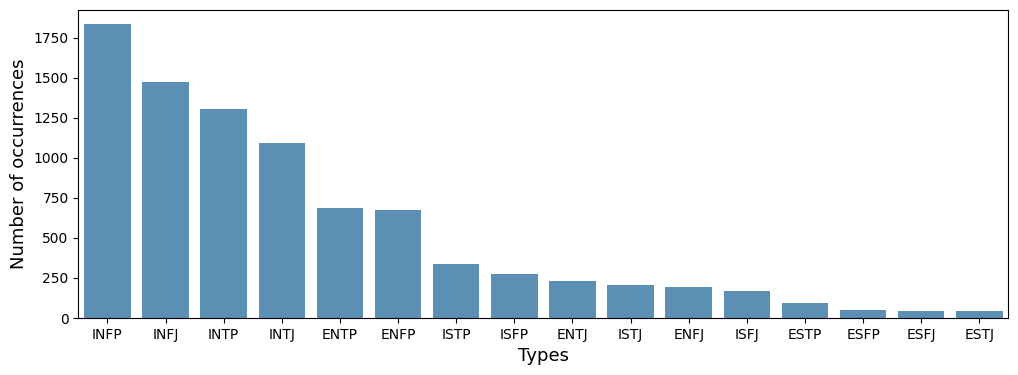

In [6]:
cnt_srs = train['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of occurrences', fontsize=13)
plt.xlabel('Types', fontsize=13)
plt.show()

In [7]:
ps['Message']= ps['Message'].fillna('')

In [10]:
ps_join= ps.groupby('PostUserId')['Message'].agg(lambda col: ' '.join(col)).reset_index()

In [12]:
etc = ExtraTreesClassifier(n_estimators=20,max_depth= 4, n_jobs= -1)
tfidf = TfidfVectorizer(ngram_range=(1,1),stop_words= 'english')
tsvd= TruncatedSVD(n_components=10)
model = Pipeline([('tfidfi', tfidf),('tsvd1', tsvd), ('etc', etc)])

In [13]:
kfolds = StratifiedKFold(n_splits= 5, shuffle= True, random_state=1)

In [14]:
np.random.seed(1)

scoring = {'acc':'accuracy', 'neg_log_loss': 'neg_log_loss', 'f1_micro': 'f1_micro'}

results= cross_validate(model, train['posts'], train['type'], cv=kfolds,
                        scoring=scoring, n_jobs=-1)

In [15]:
print("Accuracy: {:0.4f}(+/-{:0.4f})".format(np.mean(results['test_acc']),
                                               np.std(results['test_acc'])))
print("F1: {:0.4f}(+/-{:0.4f})".format(np.mean(results['test_f1_micro']),
                                               np.std(results['test_f1_micro'])))
print("Logloss: {:0.4f}(+/-{:0.4f})".format(np.mean(results['test_neg_log_loss']),
                                               np.std(results['test_neg_log_loss'])))

Accuracy: 0.2944(+/-0.0160)
F1: 0.2944(+/-0.0160)
Logloss: -2.1378(+/-0.0257)


In [16]:
def cleanText(text):
    text=BeautifulSoup(text, 'lxml').text
    text= re.sub(r'\|\|\|',r'',text)
    text=re.sub(r'http\S+', r'<URL>',text)
    return text

In [17]:
train['clean_posts'] = train['posts'].apply(cleanText)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14872\1865030108.py:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [18]:
#naive byes
np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1,1),
                         stop_words='english',
                         lowercase=True,
                         max_features=5000)

model_nb=Pipeline([('tfidf1', tfidf2), ('nb',MultinomialNB())])

results_nb=cross_validate(model_nb, train['clean_posts'], train['type'], cv=kfolds,
                          scoring=scoring, n_jobs=-1)

In [19]:
print("Accuracy: {:0.4f}(+/-{:0.4f})".format(np.mean(results_nb['test_acc']),
                                               np.std(results_nb['test_acc'])))

print("F1: {:0.4f}(+/-{:0.4f})".format(np.mean(results_nb['test_f1_micro']),
                                               np.std(results_nb['test_f1_micro'])))

print("Logloss: {:0.4f}(+/-{:0.4f})".format(np.mean(-1*results_nb['test_neg_log_loss']),
                                               np.std(-1*results_nb['test_neg_log_loss'])))


Accuracy: 0.5627(+/-0.0110)
F1: 0.5627(+/-0.0110)
Logloss: 6.2055(+/-0.3766)


In [20]:
#logistic Regression
np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1,1),
                         stop_words='english',
                         lowercase=True,
                         max_features=5000)

model_lr=Pipeline([('tfidf1', tfidf2), ('lr',LogisticRegression(class_weight="balanced", C=0.005))])

results_lr=cross_validate(model_lr, train['clean_posts'], train['type'], cv=kfolds,
                          scoring=scoring, n_jobs=-1)

In [21]:
print("Accuracy: {:0.4f}(+/-{:0.4f})".format(np.mean(results_lr['test_acc']),
                                               np.std(results_lr['test_acc'])))

print("F1: {:0.4f}(+/-{:0.4f})".format(np.mean(results_lr['test_f1_micro']),
                                               np.std(results_lr['test_f1_micro'])))

print("Logloss: {:0.4f}(+/-{:0.4f})".format(np.mean(-1*results_lr['test_neg_log_loss']),
                                               np.std(-1*results_lr['test_neg_log_loss'])))


Accuracy: 0.6561(+/-0.0138)
F1: 0.6561(+/-0.0138)
Logloss: 1.3072(+/-0.0131)


0
0
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']
train_sizes: [ 694 2255 3817 5378 6940]
train_scores: [[0.65417867 0.66426513 0.67435159 0.66426513 0.67002882]
 [0.71929047 0.70421286 0.70776053 0.7037694  0.71441242]
 [0.72517684 0.72674876 0.72072308 0.72884464 0.72334294]
 [0.73075493 0.73261435 0.73447378 0.73373001 0.73187058]
 [0.74380403 0.74164265 0.74466859 0.74351585 0.74135447]]
test_scores: [[0.35331412 0.33832853 0.34409222 0.36368876 0.38847262]
 [0.51066282 0.50317003 0.52161383 0.49971182 0.51123919]
 [0.55043228 0.54985591 0.57694524 0.55389049 0.53948127]
 [0.56887608 0.57291066 0.60518732 0.57348703 0.5648415 ]
 [0.59308357 0.59942363 0.62074928 0.58789625 0.58847262]]


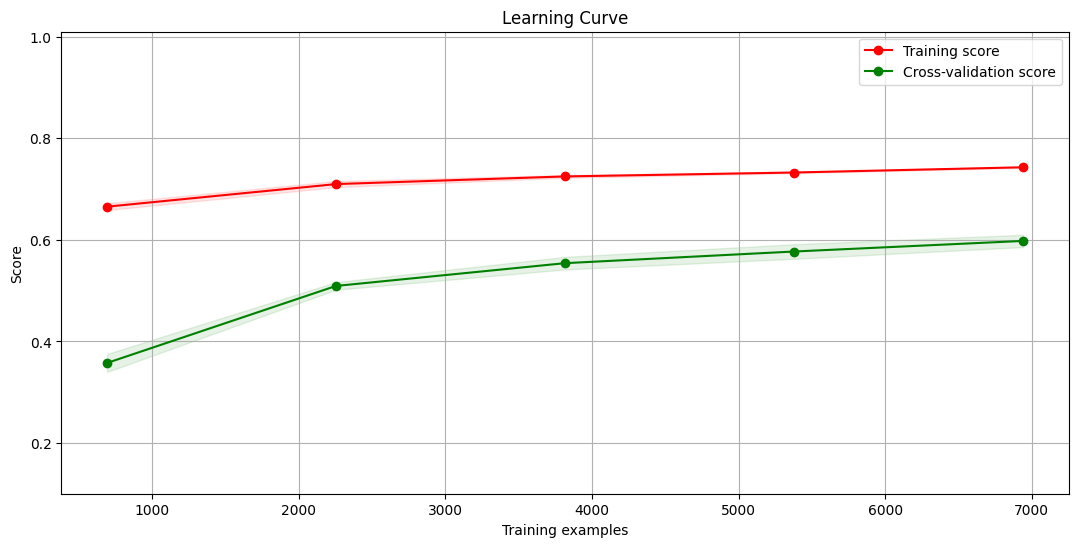

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Example data preparation (replace with your actual data)
# train = pd.DataFrame({'clean_posts': [...], 'type': [...]})

# Check for missing values
print(train['clean_posts'].isnull().sum())
print(train['type'].isnull().sum())

# Drop missing values
train = train.dropna(subset=['clean_posts', 'type'])

# Verify target variable
print(train['type'].unique())

# Vectorize text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['clean_posts'])
y = train['type']

# Define the model
model_lr = LogisticRegression(max_iter=200, solver='lbfgs')

# Use stratified k-fold cross-validation
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model_lr, X, y, cv=kfolds, n_jobs=-1,
    scoring='f1_micro', train_sizes=np.linspace(.1, 1.0, 5), random_state=1
)

# Print debug information
print(f'train_sizes: {train_sizes}')
print(f'train_scores: {train_scores}')
print(f'test_scores: {test_scores}')

# Define the plotting function
def plot_learning_curve(train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14, 8)):
    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning Curve', ylim=(0.1, 1.01), figsize=(13, 6))
plt.show()


In [126]:
ps_join['clean_comments']= ps_join['Message'].apply(cleanText)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12616\1865030108.py:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [127]:
#model_lr = LogisticRegression()
#model_lr.fit(train['clean_posts'], train['type'])
#pred_all=model_lr.predict(ps_join['clean_comments'])

# Convert text to numerical format using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train = tfidf_vectorizer.fit_transform(train['clean_posts'])
X_test = tfidf_vectorizer.transform(ps_join['clean_comments'])

# Initialize and fit the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, train['type'])

# Make predictions
pred_all = model_lr.predict(X_test)

# Print the predictions
print(pred_all)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



['INTJ' 'INTJ' 'INTJ' ... 'INTP' 'INTJ' 'INTJ']


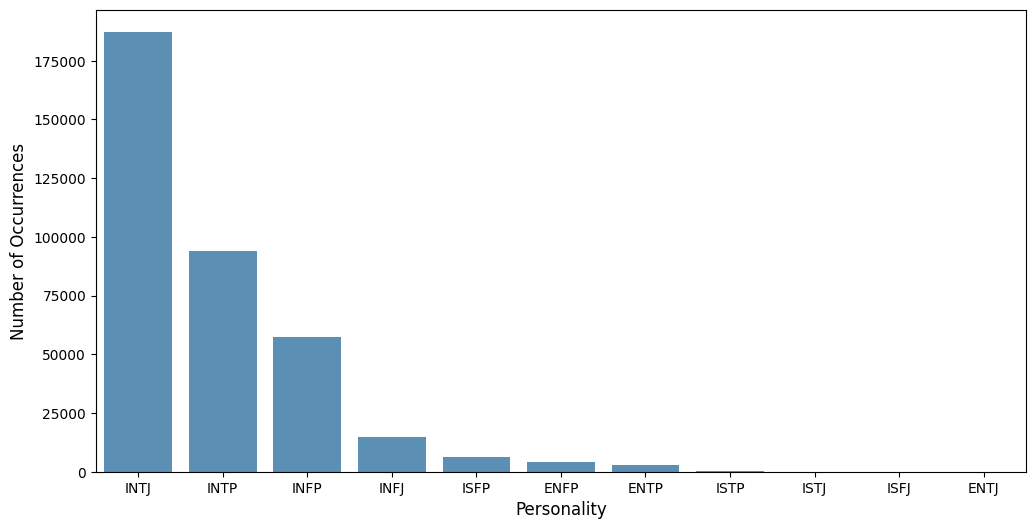

In [128]:
#cnt_all = np.unique(pred_all, return_counts=True)

#pred_df = pd.DataFrame({'personality': cnt_all[0], 'count': cnt_all[1]},
               #        columns=['personality', 'count'], index=None)

#pred_df.sort_values('count', ascending=False, inplace=True)

#plt.figure(figsize=(12,6))
#sns.barplot(pred_df['personality'],pred_df['count'],alpha=0.8)
#plt.ylabel('Number of Occurences', fontsize=12)
#plt.xlabel('Personality', fontsize=12)
#plt.show()

# Assuming pred_all is already defined
cnt_all = np.unique(pred_all, return_counts=True)

pred_df = pd.DataFrame({'personality': cnt_all[0], 'count': cnt_all[1]},
                       columns=['personality', 'count'], index=None)

pred_df.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='personality', y='count', data=pred_df, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Personality', fontsize=12)
plt.show()

In [129]:
pred_df['percent']= pred_df['count']/pred_df['count'].sum()

In [130]:
pred_df['description']= pred_df['personality'].apply(lambda x: " ".join([mbti[l] for l in list(x)]))

In [131]:
pred_df

,personality,count,percent,description
5,INTJ,187375,0.510233,Introversion Intutions Thinking Judging
6,INTP,93884,0.255652,Introversion Intutions Thinking Perceiving
4,INFP,57191,0.155734,Introversion Intutions Feeling Perceiving
3,INFJ,14892,0.040552,Introversion Intutions Feeling Judging
8,ISFP,6398,0.017422,Introversion Sensing Feeling Perceiving
0,ENFP,4286,0.011671,Extroversion Intutions Feeling Perceiving
2,ENTP,2687,0.007317,Extroversion Intutions Thinking Perceiving
10,ISTP,467,0.001272,Introversion Sensing Thinking Perceiving
9,ISTJ,49,0.000133,Introversion Sensing Thinking Judging
7,ISFJ,4,0.000011,Introversion Sensing Feeling Judging


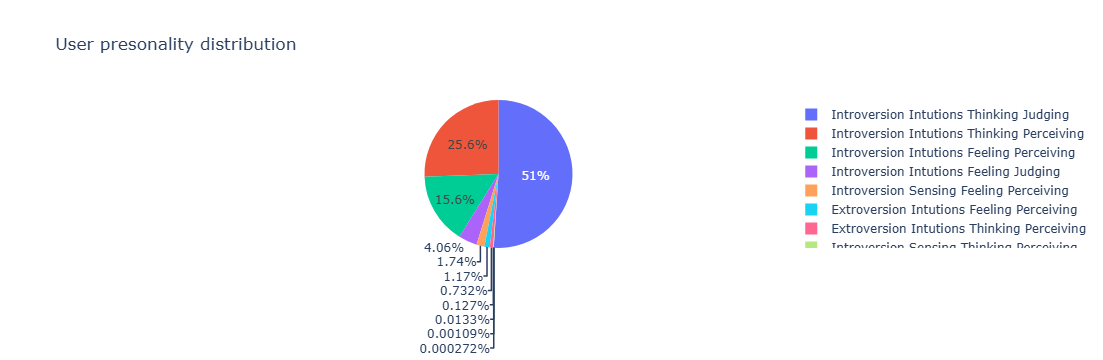

In [132]:
labels = pred_df['description']
sizes= pred_df['percent']*100

trace = go.Pie(labels = labels, values= sizes)
layout = go.Layout(
    title = 'User presonality distribution')

data= [trace]
fig= go.Figure(data= data, layout=layout)
py.iplot(fig)